
#**Image classification using CNNs**












**Description :**




Given different images of cars , we want to create a convolution neural network that can classify whether a car is damaged or not .
Dataset contains 1840 image labeled and was taken from kaggle . 

**TO DO :**

1.Exploratory data analysis.

2.Build your own CNN architecture to classify the images and evaluate it. 

3.Use Transfer learning to do the same task.


To get your API : go to Kaggle.com --> my account (top right click on the profile pic) --> scroll down to "create API token"




#**Importing data**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [8]:
#upload your kaggle.json file 
!pip install kaggle
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle
#command to get data from kaggle 
!kaggle datasets download -d datacolab/car-damage-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
car-damage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


# **Exploratory data analysis**

In [9]:
!unzip car-damage-classification.zip

Archive:  car-damage-classification.zip
replace car_damage_classification/00-damaged/0001.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace car_damage_classification/00-damaged/0002.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import os,glob


data_damaged = glob.glob("car_damage_classification/00-damaged/*.JPEG")
data_not_damaged1 = glob.glob("car_damage_classification/01-not_damaged/*.JPEG")
data_not_damaged2 = glob.glob("car_damage_classification/01-not_damaged/*.jpg")

In [0]:
data_not_damaged= data_not_damaged1+data_not_damaged2

In [0]:
data_full = data_damaged + data_not_damaged

**Plotting 25 damaged images**

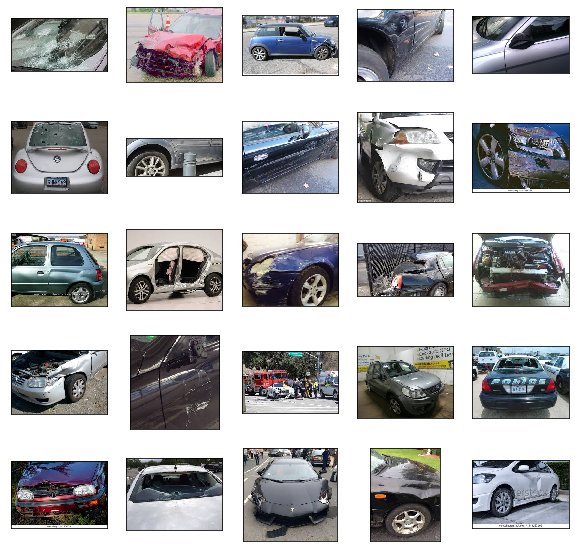

In [13]:
import matplotlib.pyplot as plt
from skimage import io, transform

plt.figure(figsize=(10,10))
for i in range(25) :
    image = io.imread(data_damaged[i]) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap = plt.cm.binary)

**Plotting 25 not damaged imaged**

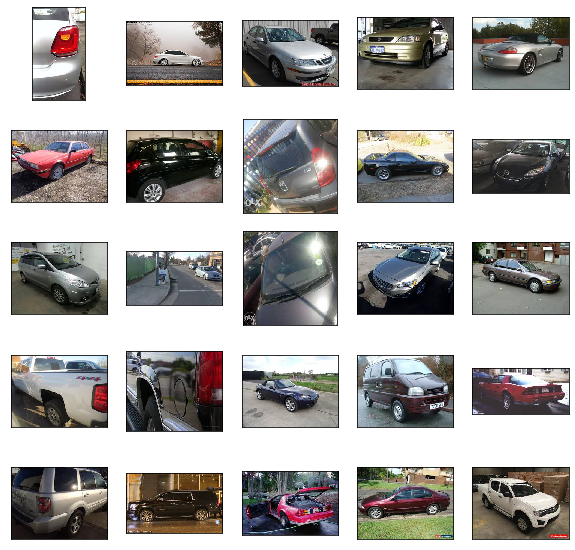

In [14]:
import matplotlib.pyplot as plt
from skimage import io, transform

plt.figure(figsize=(10,10))
for i in range(25) :
    image = io.imread(data_not_damaged[i]) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap = plt.cm.binary)

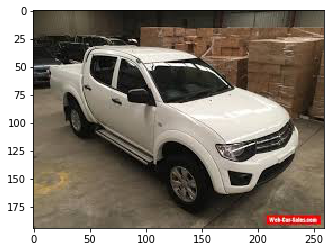

In [15]:
plt.imshow(image, cmap='Greys')

In [16]:
image.shape

(194, 259, 3)

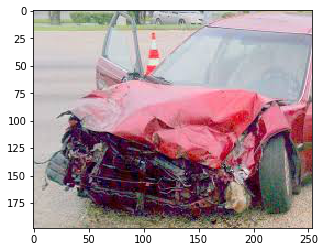

In [17]:
image1=io.imread(data_damaged[1])
plt.imshow(image1)

In [18]:
image1.shape

(198, 254, 3)

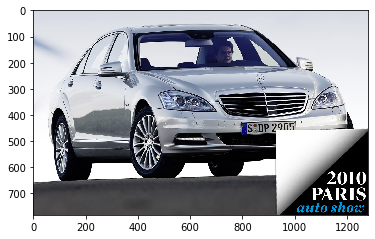

In [19]:
image2=io.imread(data_full[1700])
plt.imshow(image2)

In [20]:
image2.shape

(782, 1280, 3)

**Not all images have the same shape but all images use the color space RGB**

In [0]:
import numpy as np
def import_data() :
  X = []
  y = []
  for image in data_damaged :
    image_read = io.imread(image)
    #image_read = transform.resize(image_read, (128,128,3), mode = 'constant')
    X.append(image_read)
    y.append(0)
  for image in data_not_damaged :
    image_read = io.imread(image)
    #image_read = transform.resize(image_read, (128,128,3), mode = 'constant')
    X.append(image_read)
    y.append(1)
  return np.array(X),np.array(y)      

In [22]:
X,y = import_data()

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4568514560 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))

**Finding the average dimensions of all images** 

In [23]:
X.shape

(1786,)

In [24]:
dim1 = 0
dim2 = 0
for i in range(1786) :
  dim1 += len(X[i])
  dim2 += len(X[i][0])
avgdim1 = dim1 / 1787
avgdim2 = dim2 / 1787
print(avgdim1)
print(avgdim2)


315.50195858981533
452.77504196978174


In [0]:
def import_and_resize_data() :
  X = []
  y = []
  for image in data_damaged :
    image_read = io.imread(image)
    image_read = transform.resize(image_read, (315,452,3), mode = 'constant')
    X.append(image_read)
    y.append(0)
  for image in data_not_damaged :
    image_read = io.imread(image)
    image_read = transform.resize(image_read, (315,452,3), mode = 'constant')
    X.append(image_read)
    y.append(1)
  return np.array(X),np.array(y)  

In [26]:
X,y = import_and_resize_data()

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4568514560 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))

In [27]:
X.shape

(1786, 315, 452, 3)

# **Your own CNN architecture**

In [0]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=30)

In [0]:
X_train , X_test = X_train / 255 , X_test / 255

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D ,Activation
from keras.models import Sequential,Input,Model
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(315, 452, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=20)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
1339/1339 [==============================] - 15s 11ms/step - loss: 1.0736 - acc: 0.6004
Epoch 2/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.6709 - acc: 0.7229
Epoch 3/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.4865 - acc: 0.7976
Epoch 4/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.3908 - acc: 0.8230
Epoch 5/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.3152 - acc: 0.8813
Epoch 6/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.2477 - acc: 0.8999
Epoch 7/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.2150 - acc: 0.9164
Epoch 8/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.1870 - acc: 0.9328
Epoch 9/20
1339/1339 [==============================] - 6s 5ms/step - loss: 0.1330 - acc: 0.9567
Epoch 10/20
1339/1339 [====

In [33]:
model.evaluate(X_test, y_test)

447/447 [==============================] - 2s 4ms/step


[0.9908370258290762, 0.7628635350756464]

**Data augmentation**

In [34]:
datagen = ImageDataGenerator(rotation_range=40, zoom_range=0.2)

it = datagen.flow(X_train,y_train)
model.fit_generator(it,steps_per_epoch=100,epochs=10)

Epoch 1/10
100/100 [==============================] - 87s 866ms/step - loss: 0.7205 - acc: 0.7521
Epoch 2/10
100/100 [==============================] - 88s 884ms/step - loss: 0.4337 - acc: 0.8102
Epoch 3/10
100/100 [==============================] - 86s 862ms/step - loss: 0.3638 - acc: 0.8445
Epoch 4/10
100/100 [==============================] - 87s 866ms/step - loss: 0.3157 - acc: 0.8635
Epoch 5/10
100/100 [==============================] - 87s 871ms/step - loss: 0.3149 - acc: 0.8674
Epoch 6/10
100/100 [==============================] - 87s 874ms/step - loss: 0.2763 - acc: 0.8853
Epoch 7/10
100/100 [==============================] - 88s 877ms/step - loss: 0.2693 - acc: 0.8891
Epoch 8/10
100/100 [==============================] - 88s 882ms/step - loss: 0.2416 - acc: 0.8993
Epoch 9/10
100/100 [==============================] - 89s 886ms/step - loss: 0.2228 - acc: 0.9124
Epoch 10/10
100/100 [==============================] - 89s 887ms/step - loss: 0.2231 - acc: 0.9079


In [35]:
model.evaluate(X_test, y_test)

447/447 [==============================] - 1s 3ms/step


[6.319637256980743, 0.5570469786656783]

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(X_train,y_train, batch_size=30)
val_generator = val_datagen.flow(X_test,y_test, batch_size=20)

In [37]:

from keras import optimizers

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(315, 452, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=200, epochs=10,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)  

Epoch 1/10
200/200 [==============================] - 172s 859ms/step - loss: 0.8959 - acc: 0.5763 - val_loss: 7.2647 - val_acc: 0.5493
Epoch 2/10
200/200 [==============================] - 172s 859ms/step - loss: 0.6888 - acc: 0.6132 - val_loss: 7.1820 - val_acc: 0.5544
Epoch 3/10
200/200 [==============================] - 173s 863ms/step - loss: 0.6032 - acc: 0.6807 - val_loss: 7.2316 - val_acc: 0.5513
Epoch 4/10
200/200 [==============================] - 175s 877ms/step - loss: 0.5557 - acc: 0.7204 - val_loss: 7.3640 - val_acc: 0.5431
Epoch 5/10
200/200 [==============================] - 173s 863ms/step - loss: 0.5235 - acc: 0.7453 - val_loss: 7.2647 - val_acc: 0.5493
Epoch 6/10
200/200 [==============================] - 173s 864ms/step - loss: 0.5043 - acc: 0.7563 - val_loss: 7.1785 - val_acc: 0.5546
Epoch 7/10
200/200 [==============================] - 172s 862ms/step - loss: 0.4943 - acc: 0.7642 - val_loss: 3.3035 - val_acc: 0.5575
Epoch 8/10
200/200 [============================

# **Transfer learning**

In [0]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(315,452,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for i,layer in enumerate(vgg_model.layers):
   if i < 10 :
     layer.trainable = False
   else :
     layer.trainable = True  

In [39]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
from keras.applications.vgg16 import preprocess_input

X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

train_features_vgg = get_bottleneck_features(vgg_model, X_train)
validation_features_vgg = get_bottleneck_features(vgg_model, X_test)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (1339, 64512) 	Validation Bottleneck Features: (447, 64512)


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))

model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))




In [41]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=train_features_vgg,y=y_train,  validation_data=(validation_features_vgg,y_test), epochs=20)

Train on 1339 samples, validate on 447 samples
Epoch 1/20
1339/1339 [==============================] - 2s 2ms/step - loss: 7.9338 - acc: 0.4974 - val_loss: 8.8704 - val_acc: 0.4497
Epoch 2/20
1339/1339 [==============================] - 1s 596us/step - loss: 8.1132 - acc: 0.4966 - val_loss: 8.8704 - val_acc: 0.4497
Epoch 3/20
1339/1339 [==============================] - 1s 585us/step - loss: 8.1132 - acc: 0.4966 - val_loss: 8.8704 - val_acc: 0.4497
Epoch 4/20
1339/1339 [==============================] - 1s 593us/step - loss: 8.1132 - acc: 0.4966 - val_loss: 8.8704 - val_acc: 0.4497
Epoch 5/20
1339/1339 [==============================] - 1s 589us/step - loss: 8.1132 - acc: 0.4966 - val_loss: 8.8704 - val_acc: 0.4497
Epoch 6/20
1339/1339 [==============================] - 1s 590us/step - loss: 8.1132 - acc: 0.4966 - val_loss: 8.8704 - val_acc: 0.4497
Epoch 7/20
1339/1339 [==============================] - 1s 585us/step - loss: 8.1132 - acc: 0.4966 - val_loss: 8.8704 - val_acc: 0.4497
Epo

In [42]:
from keras.applications.resnet50 import ResNet50, preprocess_input

HEIGHT = 315
WIDTH = 452

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
datagen = ImageDataGenerator(rotation_range=40, zoom_range=0.2)

X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

train_generator  = datagen.flow(X_train,y_train)

In [44]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

FC_LAYERS = [128, 128]
dropout = 0.5

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow(X_test,y_test, batch_size=20)

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=2)
finetune_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = finetune_model.fit_generator(train_generator, epochs=10, workers=8, 
                                       steps_per_epoch=150, validation_data=val_generator, validation_steps=50,
                                       shuffle=True )

Epoch 1/10
150/150 [==============================] - 80s 535ms/step - loss: 7.9126 - acc: 0.5012 - val_loss: 8.8534 - val_acc: 0.4507
Epoch 2/10
150/150 [==============================] - 67s 448ms/step - loss: 7.9463 - acc: 0.5047 - val_loss: 7.0496 - val_acc: 0.5626
Epoch 3/10
150/150 [==============================] - 66s 442ms/step - loss: 8.0443 - acc: 0.4995 - val_loss: 8.5059 - val_acc: 0.4723
Epoch 4/10
150/150 [==============================] - 67s 450ms/step - loss: 7.8834 - acc: 0.5089 - val_loss: 7.0992 - val_acc: 0.5595
Epoch 5/10
150/150 [==============================] - 66s 441ms/step - loss: 8.0561 - acc: 0.4987 - val_loss: 8.8865 - val_acc: 0.4487
Epoch 6/10
150/150 [==============================] - 68s 456ms/step - loss: 8.2083 - acc: 0.4895 - val_loss: 8.9060 - val_acc: 0.4475
Epoch 7/10
150/150 [==============================] - 65s 433ms/step - loss: 8.0637 - acc: 0.4973 - val_loss: 8.9196 - val_acc: 0.4466
Epoch 8/10
150/150 [==============================] - 6